# Liberary in use

In [23]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split as tts
import matplotlib.pyplot as plt

# Data loading

In [2]:
boston = load_boston()

C:\Users\PC-DELL\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

# Seperating the data

In [17]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
ref = RandomForestRegressor(max_depth=7, 
                            max_features= 0.46402846729561337,
                            min_samples_split=3, n_estimators=99)

# Spliting The Data

In [18]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2, random_state=42)

# Hyper-parameter tuning

In [ ]:
%%time
import numpy as np
from hyperopt import hp, tpe, fmin,STATUS_OK,Trials

def accuracy_model(params):
    clf = RandomForestRegressor(**params)
    return cross_val_score(clf, X_train, y_train).mean()
param_space = {'max_depth': hp.choice('max_depth', range(10,100)),
'max_features': hp.uniform('max_features', 0.1,1),
'n_estimators': hp.choice('n_estimators', range(50,500)),
'min_samples_leaf': hp.choice('min_samples_leaf',range(3,5)),
'min_samples_split': hp.choice('min_samples_split',range(2,10)),
'criterion': hp.choice('criterion', ["squared_error", "absolute_error", "poisson"])}
best = 0
def f(params):
    global best
    acc = accuracy_model(params)
    if acc > best:
        best = acc
    return {'loss': -acc, 'status': STATUS_OK}
Trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=500, trials= Trials)
print('New best:', best, best_params)
print(best_params)
100%|█████████████████████████████████████████████| 500/500 [42:17<00:00,  5.08s/trial, best loss: -0.8319327043109389]
New best: 0.8319327043109389 {'criterion': 0, 'max_depth': 7, 'max_features': 0.46402846729561337, 'min_samples_leaf': 0, 'min_samples_split': 3, 'n_estimators': 99}
{'criterion': 0, 'max_depth': 7, 'max_features': 0.46402846729561337, 'min_samples_leaf': 0, 'min_samples_split': 3, 'n_estimators': 99}
CPU times: total: 22min 42s
Wall time: 42min 18s

In [19]:
ref.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features=0.46402846729561337,
                      min_samples_split=3, n_estimators=99)

In [26]:
ref.score(X_test,y_test)

0.8702869458373699

# Calculating and analysing features for identifying, track and action on important features that have impact on business 

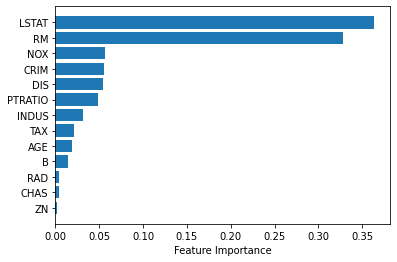

In [41]:
sort = ref.feature_importances_.argsort()
plt.barh(boston.feature_names[sort], ref.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()